## 데이터 기본 정보 확인

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
# 작업 디렉토리 경로 설정
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/anomaly_detection/")
os.getcwd()

In [ ]:
import pandas as pd  

df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

df = pd.concat([df_train, df_test], axis=0)
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [ ]:
# 데이터 형태 확인
print('df :', df.shape)

df : (6225249, 26)


In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225249 entries, 0 to 1867912
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   groupId          int64  
 2   matchId          int64  
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  maxPlace         int64  
 15  numGroups        int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(20)
memory usage: 1.3

In [ ]:
# 결측치 확인
print(df.isnull().sum())

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
kills                    0
killStreaks              0
longestKill              0
maxPlace                 0
numGroups                0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints                0
winPlacePerc       1867913
dtype: int64


In [ ]:
# 결측치 있는 행 확인
df[df['winPlacePerc'].isna()].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,47734,1659463,47734,0,0,100.0,1,0,0,59,1000,0,0,0.000,50,45,0,0.0,0,0.0,1,0,421.50,7,1500,NaN
1,47735,1659508,47735,0,1,400.0,2,0,3,9,1200,4,2,15.420,48,47,1,0.0,0,0.0,0,0,655.80,4,1526,NaN
2,47736,1659555,47736,0,0,0.0,0,0,0,72,1216,0,0,0.000,29,28,0,0.0,0,0.0,0,0,74.58,1,1475,NaN
3,47737,1659621,47737,0,0,68.6,0,0,0,68,1177,0,0,0.000,97,92,0,0.0,0,0.0,0,0,167.20,2,1464,NaN
4,47738,1659675,47738,0,1,370.5,3,0,1,45,1013,1,1,5.968,27,26,0,0.0,0,0.0,0,0,146.70,3,1505,NaN


## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
na = df[df['winPlacePerc'].isna()]
nna = df.dropna()

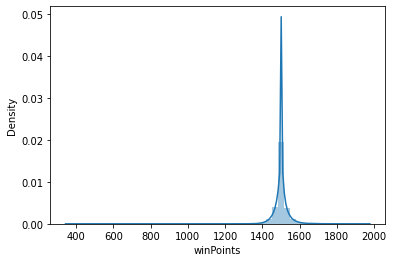

In [ ]:
sns.distplot(na['winPoints']);

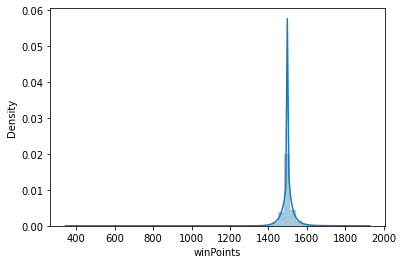

In [ ]:
sns.distplot(nna['winPoints']);

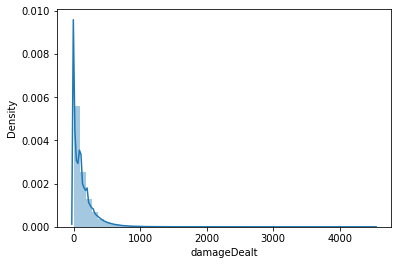

In [ ]:
sns.distplot(na['damageDealt']);

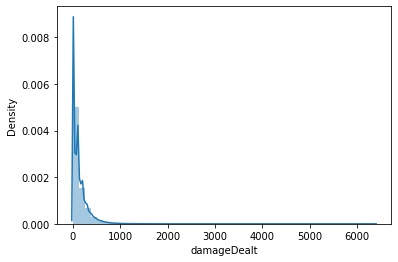

In [ ]:
sns.distplot(nna['damageDealt']);

In [ ]:
# 결측치 데이터 삭제 (이미 많은 양의 데이터가 있기때문)
df = df.dropna()
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [ ]:
# 데이터 분포 확인
df.describe().round(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00
mean,3102678.01,1024776.56,23855.39,0.27,0.96,132.90,0.69,0.24,1.19,47.03,1080.90,0.93,0.55,19.88,42.08,40.58,0.16,423.88,0.00,4.14,0.01,0.01,1055.12,3.46,1500.50,0.47
std,1797477.32,696719.69,13782.27,0.63,1.56,169.94,1.19,0.61,2.37,27.33,123.71,1.57,0.72,45.87,22.68,22.07,0.47,1222.93,0.06,27.57,0.13,0.07,1116.12,2.40,42.54,0.31
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,155.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,350.00,0.00
25%,1537745.75,474137.75,11914.00,0.00,0.00,0.00,0.00,0.00,0.00,23.00,1000.00,0.00,0.00,0.00,28.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00,133.40,2.00,1491.00,0.20
50%,3110605.50,943032.00,23837.00,0.00,0.00,87.76,0.00,0.00,0.00,47.00,1029.00,0.00,0.00,0.00,30.00,29.00,0.00,0.00,0.00,0.00,0.00,0.00,573.20,3.00,1500.00,0.46
75%,4657295.25,1418544.00,35801.00,0.00,1.00,188.40,1.00,0.00,1.00,70.00,1126.00,1.00,1.00,16.29,49.00,47.00,0.00,0.00,0.00,0.00,0.00,0.00,1808.00,5.00,1510.00,0.74
max,6224522.00,2700605.00,47733.00,20.00,18.00,6384.00,63.00,26.00,59.00,100.00,2047.00,60.00,14.00,1323.00,100.00,100.00,41.00,48390.00,42.00,5286.00,6.00,5.00,17300.00,76.00,1923.00,1.00


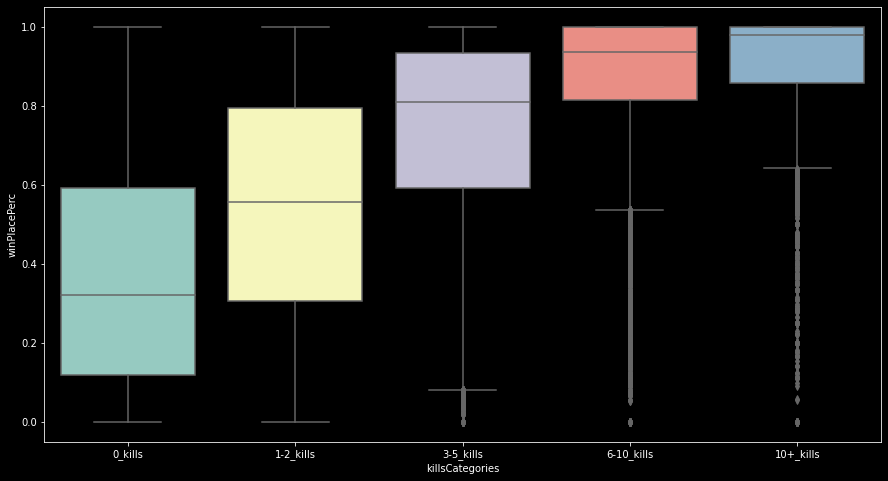

In [ ]:
# 연속형 변수 카테고리 변환 후 박스플랏 확인  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

kills = df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1,0,2,5,10,60], labels= ['0_kills', '1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x='killsCategories', y='winPlacePerc', data=kills)
plt.show()

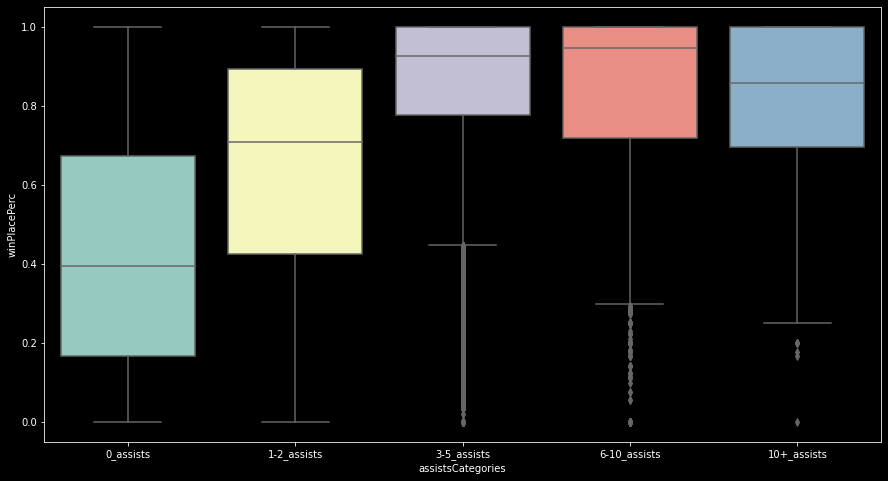

In [ ]:
plt.style.use(['dark_background'])

assists = df.copy()

assists['assistsCategories'] = pd.cut(assists['assists'], [-1,0,2,5,10,20], labels= ['0_assists', '1-2_assists', '3-5_assists', '6-10_assists', '10+_assists'])
plt.figure(figsize=(15,8))
sns.boxplot(x='assistsCategories', y='winPlacePerc', data=assists)
plt.show()

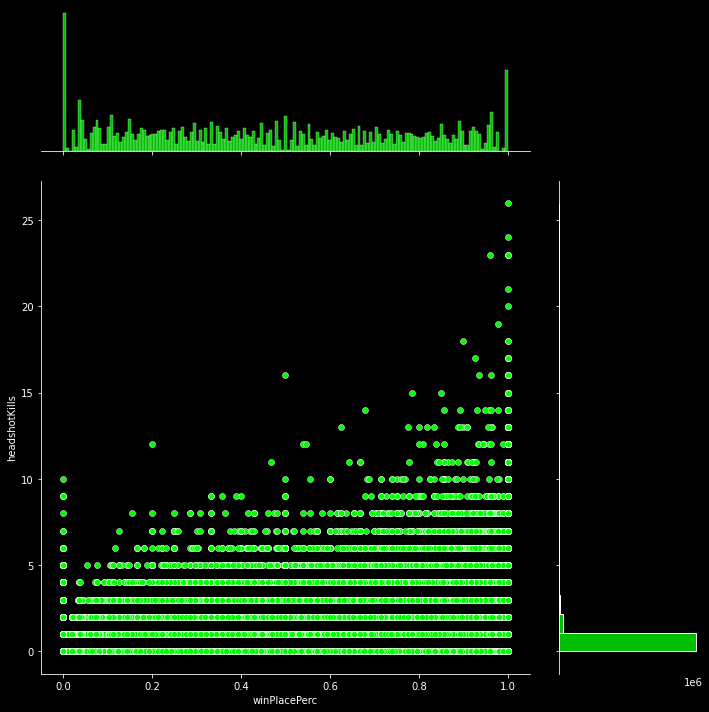

In [ ]:
# 승률과 헤드샷킬수의 분포 확인
sns.jointplot(x='winPlacePerc',y='headshotKills', data=df, height=10, ratio=3, color="lime")
plt.show()

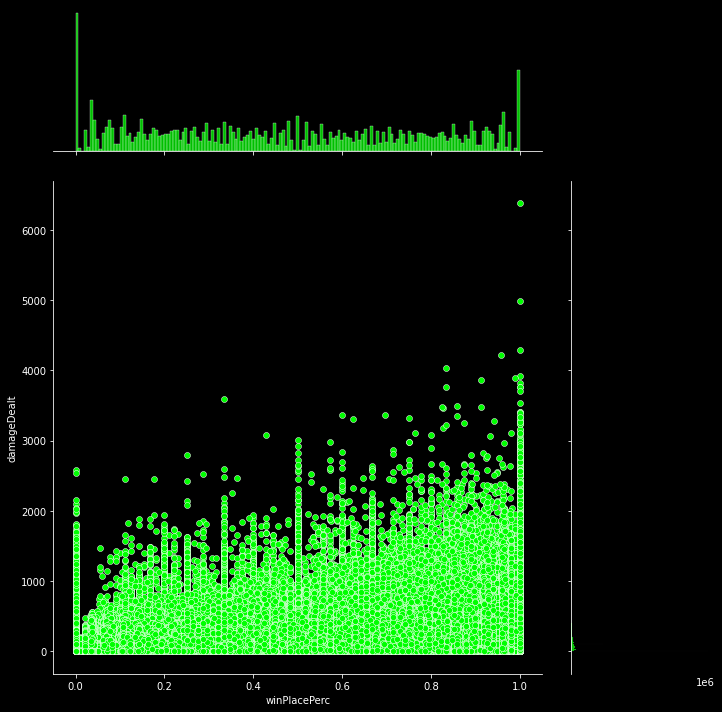

In [ ]:
# 승률과 딜량의 분포 확인
sns.jointplot(x='winPlacePerc',y='damageDealt', data=df, height=10, ratio=3, color="lime")
plt.show()

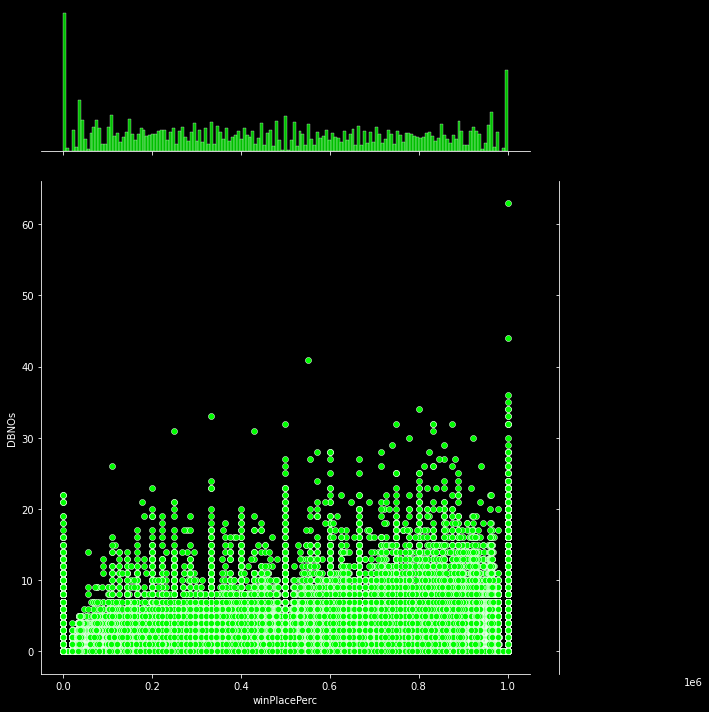

In [ ]:
# 승률과 DBNOs의 분포 확인
sns.jointplot(x='winPlacePerc',y='DBNOs', data=df, height=10, ratio=3, color="lime")
plt.show()

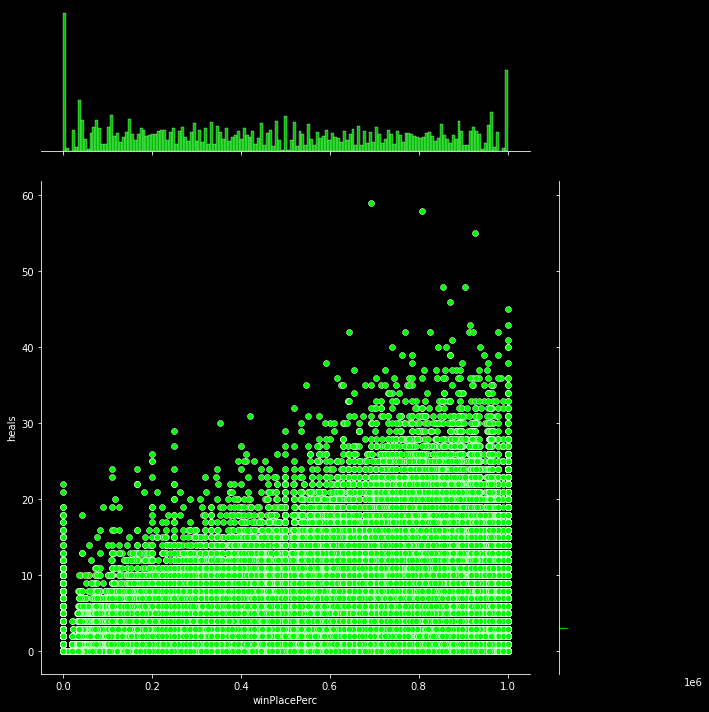

In [ ]:
# 승률과 힐 아이템 사용횟수의 분포 확인
sns.jointplot(x='winPlacePerc',y='heals', data=df, height=10, ratio=3, color="lime")
plt.show()

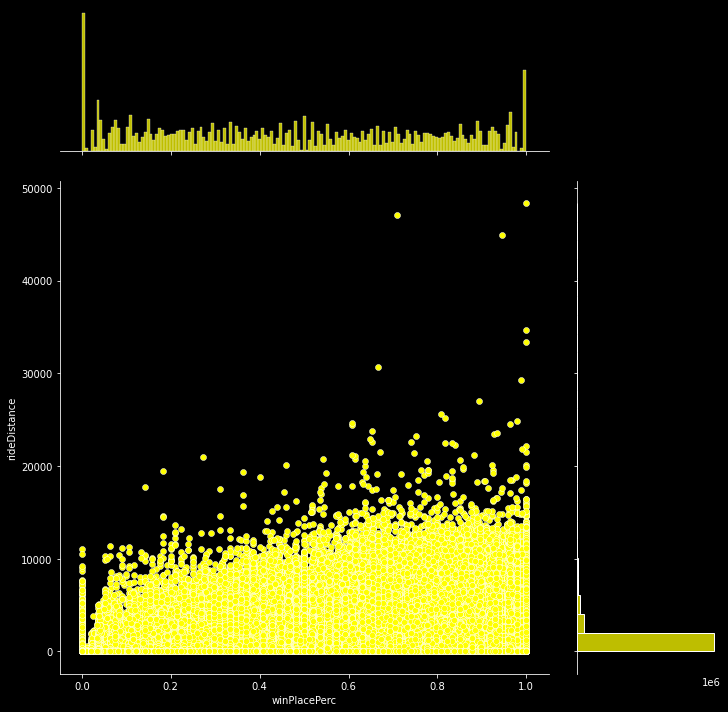

In [ ]:
# 승률과 이동거리의 분포 확인
sns.jointplot(x='winPlacePerc',y='rideDistance', data=df, height=10, ratio=3, color="yellow")
plt.show()

In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


## 모델링

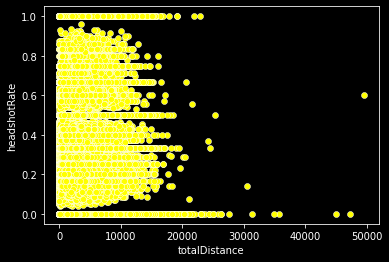

In [ ]:
# 이동거리는 낮은데 헤드샷킬 비율이 높은 유저 탐색
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

df['headshotRate'] = df['headshotKills']/df['kills']
df['headshotRate'] = df['headshotRate'].fillna(0)

sns.scatterplot(x='totalDistance',y='headshotRate', data=df, color="yellow");

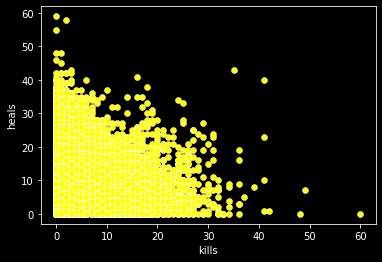

In [ ]:
# 힐 사용량 없이 킬수가 많은 데이터 확인
sns.scatterplot(x='kills',y='heals', data=df, color="yellow");

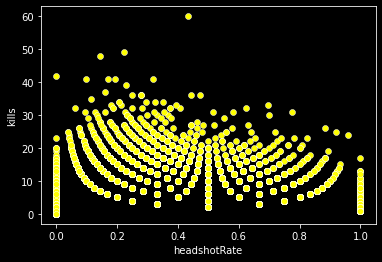

In [ ]:
# 헤드샷만 쏘는 유저 확인
sns.scatterplot(x='headshotRate',y='kills', data=df, color="yellow");

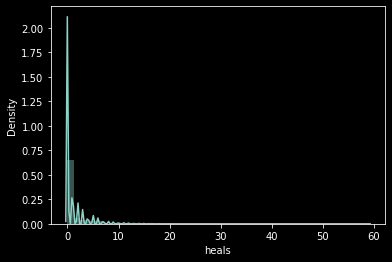

In [ ]:
# 힐 아이템을 너무 많이 쓰는 유저 확인
sns.distplot(df['heals']);

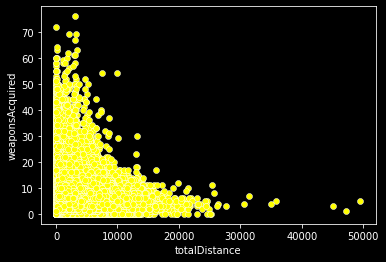

In [ ]:
# 이동 없이 무기를 획득하는 유저 확인
sns.scatterplot(x='totalDistance',y='weaponsAcquired', data=df, color="yellow");

In [ ]:
# 팀킬이 많은 유저?
print(len(df[df['teamKills'] >= 5]))
df[df['teamKills'] >= 5].head(10)

10


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate
118641,159556,580348,23174,5,0,1790.0,0,0,0,4,1000,11,1,35.760,9,6,0,0.0,0,0.0,6,0,0.00,15,1500,0.625,0.00,0.000000
309567,432310,580349,23174,6,0,1088.0,0,0,0,7,1000,7,2,21.960,9,6,0,0.0,0,0.0,5,0,0.00,13,1500,0.375,0.00,0.000000
452726,636830,580345,23174,2,0,1585.0,0,0,0,2,1000,13,3,59.440,9,6,0,0.0,0,0.0,5,0,286.70,14,1500,1.000,286.70,0.000000
500391,704934,580346,23174,1,0,909.9,0,0,0,5,1000,10,1,9.370,9,6,0,0.0,0,0.0,6,0,230.60,15,1500,0.875,230.60,0.000000
508216,712759,922730,31016,1,0,1661.0,18,3,7,2,1000,9,2,10.390,2,2,0,0.0,0,0.0,5,0,847.50,27,1500,0.000,847.50,0.333333
602865,848207,900073,30503,5,0,2534.0,22,1,1,3,1000,16,4,347.400,5,5,1,0.0,0,0.0,5,0,743.60,26,1500,0.000,743.60,0.062500
714943,1001021,1656492,47661,4,0,1330.0,16,2,7,20,1000,9,2,100.200,9,9,3,0.0,0,0.0,6,0,167.40,23,1500,0.000,167.40,0.222222
1189897,1699015,315851,1713,4,0,1043.0,9,0,3,38,1000,3,1,87.600,10,10,0,2079.0,0,0.0,6,0,1074.00,28,1500,0.000,3153.00,0.000000
1303541,1853104,495124,21211,3,0,752.6,9,0,0,44,1000,1,1,4.527,6,6,1,0.0,0,0.0,6,0,91.42,33,1500,0.000,91.42,0.000000
1350694,1920474,495124,21211,1,0,1356.0,13,1,1,40,1000,3,1,52.550,6,6,0,0.0,0,0.0,6,0,88.46,35,1500,0.000,88.46,0.333333


In [ ]:
# totalDistance, headshotRate 활용
# 10분위수 확인

df_1 = df[(df['totalDistance'] <= df['totalDistance'].quantile(0.10)) & (df['headshotRate']  >= 0.8)]
print(len(df_1))
df_1.head()

9276


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate
200,200,445186,200,0,0,240.2,1,1,0,41,1133,1,1,1.153,28,28,0,0.0,0,0.0,0,0,31.20,1,1481,0.0000,31.20,1.0
403,403,1337806,403,0,0,249.2,1,1,0,34,1326,1,1,4.841,38,35,0,0.0,0,0.0,0,0,32.71,1,1447,0.0000,32.71,1.0
784,784,2606376,784,0,0,189.2,0,1,0,42,1093,1,1,34.690,96,94,0,0.0,0,0.0,0,0,35.39,1,1477,0.2000,35.39,1.0
1441,1441,197195,1441,0,0,100.0,0,1,0,33,1024,1,1,36.790,96,95,0,0.0,0,0.0,0,0,31.32,1,1484,0.1158,31.32,1.0
1565,1565,250485,1565,0,0,100.0,1,1,0,33,1000,1,1,6.801,20,20,0,0.0,0,0.0,0,0,35.17,1,1500,0.1053,35.17,1.0


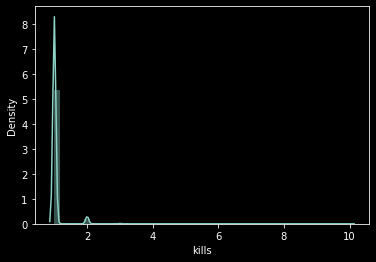

In [ ]:
# 더 자세한 분포 확인
sns.distplot(df_1['kills']);

In [ ]:
df['totalDistance'].quantile(0.10), df['totalDistance'].quantile(0.90)

(37.89, 3812.67)

In [ ]:
# 이상 유저 탐색
df_1[df_1['kills'] > 6][['kills', 'totalDistance', 'headshotRate']]

,kills,totalDistance,headshotRate
500360,8,0.00,0.875000
524698,10,30.83,0.800000
1177100,7,0.00,0.857143
2383933,10,0.00,0.800000
3277980,7,14.52,0.857143


In [ ]:
# 힐 아이템 사용 횟수와 킬 수 확인
df[['heals', 'kills']].describe()

,heals,kills
count,4.357336e+06,4.357336e+06
mean,1.187169e+00,9.344958e-01
std,2.366389e+00,1.566192e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00
max,5.900000e+01,6.000000e+01


In [ ]:
# 킬 수가 너무 적음
df['heals'].quantile(0.10), df['kills'].quantile(0.90)

(0.0, 3.0)

In [ ]:
df['kills'].mean()+3*df['kills'].std()

5.633072738084219

In [ ]:
# 힐 아이템은 0회, 킬 수는 평균의 3 표준편차 이상
df_2 = df[(df['heals'] <= df['heals'].quantile(0.10)) & (df['kills']  >= df['kills'].mean()+3*df['kills'].std())]
print(len(df_2))
df_2[['heals', 'kills']]

8238


,heals,kills
79,0,7
161,0,7
531,0,16
745,0,7
976,0,6
...,...,...
4354081,0,7
4355347,0,8
4356162,0,6
4356264,0,8


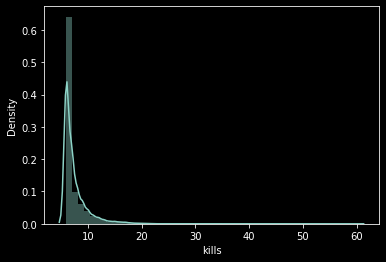

In [ ]:
# 킬 수 분포 확인
sns.distplot(df_2['kills']);

In [ ]:
# 이상 유저 탐색
df_2[df_2['kills'] > 30][['kills', 'heals']].sort_values(by=['kills'], ascending =False)

,kills,heals
910050,60,0
74095,48,0
455912,36,0
88198,34,0
34674,33,0
319149,33,0
722495,33,0
4138946,33,0
409678,32,0
671890,32,0


In [ ]:
# 헤드샷만 쏘는 유저 확인
df_3 = df[df['headshotRate'] == 1]
print(len(df_3))
df[df['headshotRate'] == 1].head()

266984


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.550,26,23,0,0.0,0,0.00,0,0,119.6,3,1511,0.0400,119.60,1.0
10,10,45059,10,0,1,166.00,0,1,1,35,1000,1,1,31.130,98,96,0,0.0,0,0.00,0,0,184.5,3,1500,0.4536,184.50,1.0
32,32,1010453,32,0,3,214.90,1,2,4,19,1047,2,1,127.000,49,48,0,1576.0,0,0.00,0,0,1526.0,3,1502,0.7292,3102.00,1.0
33,33,1054979,33,0,0,166.20,1,1,0,37,1281,1,1,1.657,30,30,0,0.0,0,0.00,0,0,133.1,2,1544,0.2414,133.10,1.0
50,50,1802026,50,0,3,360.30,3,2,15,15,1046,2,1,4.853,26,26,0,0.0,0,75.86,0,0,2669.0,6,1480,0.6800,2744.86,1.0


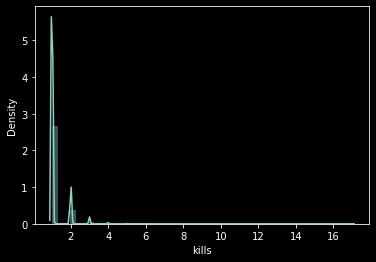

In [ ]:
sns.distplot(df_3['kills']);

In [ ]:
df_3['kills'].describe()

count    266984.000000
mean          1.173804
std           0.479215
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          17.000000
Name: kills, dtype: float64

In [ ]:
df_3['kills'].mean()+3*df_3['kills'].std()

2.6114506424929758

In [ ]:
df_3[df_3['kills'] > 3]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate
1826,1826,365848,1826,0,4,508.2,5,4,3,6,1105,4,2,97.73,29,29,0,0.0000,0,0.00,1,0,3132.0,5,1499,0.9643,3132.0000,1.0
3029,3029,891255,3029,0,2,378.4,3,4,2,6,1276,4,2,116.20,29,29,0,0.0000,0,0.00,0,0,3332.0,4,1561,0.9643,3332.0000,1.0
4591,4591,1580411,4591,0,0,537.7,0,5,0,5,1679,5,1,188.50,98,96,0,0.0000,0,0.00,0,0,316.1,4,1470,0.5567,316.1000,1.0
6894,6894,2563974,6894,0,1,328.3,2,4,0,4,1389,4,3,14.67,31,31,0,0.0000,0,0.00,0,0,350.5,4,1471,0.5000,350.5000,1.0
10825,10825,36834,10825,1,5,316.9,1,4,4,4,1279,4,2,65.11,50,50,0,0.0000,0,0.00,0,0,2976.0,5,1480,0.9184,2976.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336581,6189184,1313287,39857,1,0,473.7,0,4,1,7,1000,4,1,32.34,97,94,0,0.0000,0,0.00,0,0,832.2,4,1500,0.6458,832.2000,1.0
4347714,6207807,1110362,35247,1,5,424.7,3,5,4,5,1057,5,1,91.92,29,29,0,0.0000,0,0.00,0,0,3271.0,7,1519,1.0000,3271.0000,1.0
4348392,6208485,1237627,38140,3,4,644.9,1,4,7,3,1212,4,2,197.20,27,26,1,3906.0000,0,13.00,0,0,6281.0,5,1594,1.0000,10200.0000,1.0
4350372,6210465,1609769,46582,0,0,400.0,3,4,0,6,1066,4,4,19.08,27,26,0,0.0000,0,0.00,0,0,328.5,2,1438,0.1154,328.5000,1.0


In [ ]:
# 이상 유저 탐색
df_3[df_3['kills'] > 10][['kills', 'headshotRate']].sort_values(by=['kills'], ascending =False)

,kills,headshotRate
3902972,17,1.0
2411348,13,1.0
3201166,13,1.0
3409867,13,1.0
4277997,12,1.0
458289,11,1.0
3204285,11,1.0
4242764,11,1.0


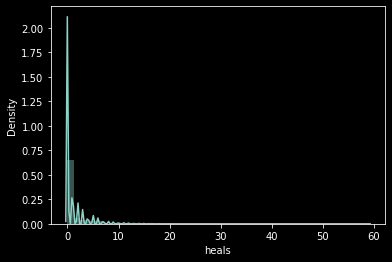

In [ ]:
sns.distplot(df['heals']);

In [ ]:
df['heals'].describe().round(2)

count    4357336.00
mean           1.19
std            2.37
min            0.00
25%            0.00
50%            0.00
75%            1.00
max           59.00
Name: heals, dtype: float64

In [ ]:
# 이상 유저 탐색
df[df['heals']>50]['heals']

271303     55
721128     58
1546110    59
Name: heals, dtype: int64

In [ ]:
df['totalDistance'].quantile(0.10), df['weaponsAcquired'].quantile(0.90)

(37.89, 6.0)

In [ ]:
# 이동거리는 짧은데 무기 획득횟수가 많은 유저 조회
df_5 = df[(df['totalDistance'] <= df['totalDistance'].quantile(0.10)) & (df['weaponsAcquired']  >= df['weaponsAcquired'].quantile(0.90))]
print(len(df_5))
df_5.head()

2265


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate
896,896,2655234,896,0,0,296.1,2,0,1,17,1000,0,0,0.000,6,6,0,0.0,0,0.0,1,0,0.0,8,1500,0.2000,0.0,0.000000
1777,1777,344864,1777,6,0,1087.0,13,6,0,1,1000,12,2,1.539,4,4,5,0.0,0,0.0,0,0,0.0,9,1500,1.0000,0.0,0.500000
3260,3260,993275,3260,0,0,510.9,0,1,0,6,1000,6,1,46.490,14,10,0,0.0,0,0.0,0,0,0.0,10,1500,0.7692,0.0,0.166667
3405,3405,1057673,3405,3,1,1462.0,0,5,6,1,1000,15,1,83.780,7,7,0,0.0,0,0.0,0,0,0.0,29,1500,1.0000,0.0,0.333333
3612,3612,1148248,3612,12,0,2322.0,19,5,0,2,1000,18,2,87.960,5,5,0,0.0,0,0.0,0,0,0.0,33,1500,0.7500,0.0,0.277778


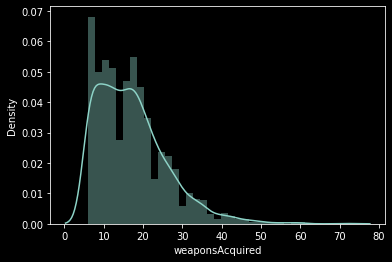

In [ ]:
# 무기획득횟수 분포 확인
sns.distplot(df_5['weaponsAcquired']);

In [ ]:
# 이상유저탐색
df_5[df_5['weaponsAcquired']>50][['totalDistance', 'weaponsAcquired']].sort_values(by=['totalDistance'])

,totalDistance,weaponsAcquired
1525623,0.000,55
492307,8.284,58
455912,9.554,58
74113,18.790,53
817586,24.380,60
198722,24.570,60
444634,25.310,51
1072609,30.490,72
966854,34.290,55
550242,37.670,51
